<a href="https://colab.research.google.com/github/Connoroverbay/linearRegression/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Question 1:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [11]:
df = pd.read_csv('/content/Q1_clean.csv')
df.head()

df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [10]:
df.loc[:,['Neighbourhood','Price']].groupby('Neighbourhood').describe()

Price                                                      \
                 count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                
Bronx            217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn        8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan      11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens          1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island     96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                        
                   max  
Neighbourhood           
Bronx            244.0  
Brooklyn        4500.0  
Manhattan      10000.0  
Queens           950.0  
Staten Island   5000.0

Manhattan is the most expensive on average because it has the highest mean price when grouped by neighborhood.

<Axes: xlabel='Price', ylabel='Density'>

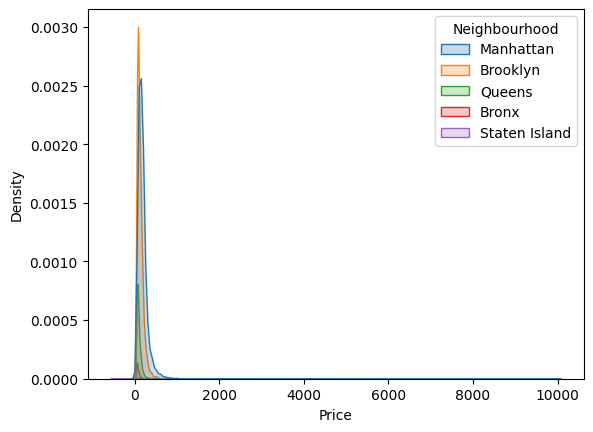

In [18]:
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', fill=True)

<Axes: xlabel='Price', ylabel='Density'>

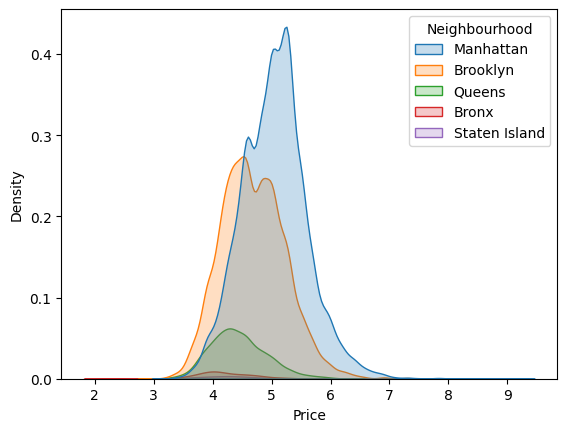

In [19]:
sns.kdeplot(data=df, x=np.log(df['Price']), hue='Neighbourhood', fill=True)

In [22]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

regression = pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'coefficient': reg.coef_})
regression


,Neighborhood,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


Running this regression shows that when there is a one variable dummy regression, then the coefficents associated with the different neighborhoods will just be equal to the mean value of the dependent variable-- in this case the price.

In [28]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

regression = pd.DataFrame({'Neighborhood':reg.feature_names_in_, 'coefficient': reg.coef_})
regression


,Neighborhood,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In order to have dummy variables and an intercept estimator in the same regression, one of the dummy variables must be dropped in order to aviod multicolinearity and the dummy variable trap. In this case, dropping the first dummy or the Bronx neighborhood is what was required to allow for a valid intercept.

In [26]:
reg.intercept_

75.27649769585331

In [38]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating','Neighbourhood']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Must remove intercept to see all dummy categories
y_hat = reg.predict(Z_test)
print(reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(rmse)
Regression = pd.DataFrame({'Variable/Dummy':reg.feature_names_in_, 'Coefficient': reg.coef_})
Regression

0.06701086106947296
125.01092061382933


,Variable/Dummy,Coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The R squared value and RMSE are printed above and the coefficent for Review Scores Rating is 1.0322. According to the regression the most expensive kind of property to buy is in Manhattan because the price increases the most if the Manhattan dummy variable is included in the regression equation.

In [52]:
y = df['Price']
X = df.loc[:,['Review Scores Rating','Neighbourhood','Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],axis = 1)


reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print(reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print(rmse)
Regression = pd.DataFrame({'Variable/Dummy':reg.feature_names_in_, 'Coefficient': reg.coef_})
Regression

0.22035348129282306
114.27692123130633


,Variable/Dummy,Coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


An entire room appt in Manhattan would be the most expensive, along with the maximum rating score. Since the variable changes from part 4 to 5, this means that some of the variation attributed to changes in review scores rating in part 4 was likely actually caused by the room type, just simply was not included in the previous regression. This would mean that the regresssion in part 4 was likely underspecified, further justified by the higher R squared value and lower RMSE for the regression in part 5.

###Question 4:

When will
 be large or small, depending on the relationship between
 and
 and the amount of "noise"/variance in
? What does
 represent?
Suppose you have measurement error in
 which artificially inflates its variance (e.g. bad data cleaning). What happens to the
 coefficient? How will affect your ability to predict? (This phenomenon is called attenuation.)
Let's return to the question of outliers. With your formula for the OLS coefficients
, explain what happens if you significantly increase a single value of the outcome/target/response variable
 or one of the predictor/explanatory/covariate variables
. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?
Show that if you regress a variable
 on a one-hot encoded variable and no intercept, the regression coefficients are the group averages.

The b* value will get extremely large when the covariance between x and y is very large or when the variance in x is very small. This makes sense intuitively because if x and y have a strong degree of correlation, then the SSE will change much more drastically due to a change in the b* value. The a* value is change in SSE due to a change in the intercept of the original fitted regression.

If this happens, then the b* value will be low, meaning that the change in SSE due to a change in b will be understated. This would make prediction more difficult as the b value would likely skew the other metrics of model fitness such as R and adj R squared values.

Both of these situations would lead to a diminished b* value. This would lead to the model performing poorly on average observations becacause they are skewing the averages of SSE values. If values are averaged, then the ultimate effect will be lower than if not but still could cause statistical impercision.

In [53]:
np.random.seed(100)
N = 30

x =np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b1 = 3
y =b1*x + eps

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    y_hat = b1*x
    residuals = y - y_hat

    return({'b1':b1,'y_hat':y_hat,'residuals':residuals,
            'sum':sum(y_hat)})


slr(x,y)



{'b1': 3.3642124899384283,
 'y_hat': array([-5.88658286,  1.15284969,  3.87905745, -0.84924847,  3.30137165,
         1.72994145,  0.74409541, -3.59985314, -0.63750424,  0.85787904,
        -1.54090011,  1.46398244, -1.96333776,  2.74804712,  2.26317574,
        -0.35126127, -1.78734008,  3.46423956, -1.47398133, -3.76226021,
         5.44659832,  5.18628738, -0.84737495, -2.83413283,  0.62076008,
         3.15254365,  2.45924049,  4.58056412, -1.09753415,  0.18730594]),
 'residuals': array([ 1.30448527, -4.45445947, -2.68900696,  2.54130239,  1.893925  ,
        -1.55512571,  3.48831041, -4.68212733, -4.0001804 , -3.79017825,
        -1.46649834, -2.16300719,  0.2344963 , -2.13632211,  3.6542309 ,
        -5.16125903, -2.75643135,  0.69748175, -4.68116104,  4.81944707,
        -4.15370613, -2.21071044, -2.72840096, -2.17697148,  0.25938639,
         1.18213173, -2.85292149,  3.25251348, -0.12001376, -2.68947234]),
 'sum': 16.606628139089924}

###Question 5:(Just chose to do as extra pactice but I ran into some issues. Figured I would keep it on the assignment anyways.)

The dataset that I chose to work with was downloaded from kaggle about different metrics that can be used to determine the total number of streams that a song recieves and by looking at different characteristics of the songs.

In [57]:
 df1 = pd.read_csv('/content/spotify-2023.csv', encoding='latin1')
 df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [58]:
df1['streams'].describe()
df1['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df1['streams'].describe()

df1['streams'] = df1['streams']/100000

df1.describe()


KeyError: 'streams'

In [59]:
from sklearn.model_selection import train_test_split

y = df1['streams']
X = df1.drop('streams',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


In [60]:
def slr(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    print(residuals)
    print(b0,b1)
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})


x = df1['bpm']
y = df1['streams']

reg = slr(x,y) # Run the regression

plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line', color ='black')

plt.show()

TypeError: Could not convert 1413817031337162861400039748008408173032363221837062347259801125814937895217315553634067505671438582551501316855716387570742251318849311630936544967956863054688333522223436336973886444842521352481297026226200647221115364561783006548991833846124528942982981212740895422581161522942668439575109997482776189903931231224131889335021355959075786181836176553476354495408280809655011094331691047101291651561995705150541085685420164799040125655296935187451081077538501777406661533720115787644018136736663703895074256483385121408335816011326812019557111947664156338624720434240357925728674072710175521442140456283637319995814780425395781785426610225579757627511345272282771485135656509315929097896354120451230675890585695368438576272009094673600976848397090923922892926653439222236332382887241814144075781816548413358054811157058870951319982503052486850325333841195614456515012756754039968675898363750811848234788283118428640016517282590612415590432956222077309611160522450611169956338380799001163620694109360552617965929439058561369121231205951614179100057020166085924808896190839753607123776558423452110507843428979382762330346424601863821195353382623225801222355719893669025039627374643097745128481987472197559812171207101092761322762591785422563225595290746815831262594040133811022531195664116876640271159938861170055211338657881089402494411747614255932395318735449505363412794348632338016321481349984142095275618885532201146418311673307379299648094360278856577236132713922350621660989159122378495090647115932707371410088830123500553316611873191374581173941864661788326445184036461714357377568467581411138388731267333350726307468356254389011310909403073701441271293243265882712841749534479563788063970702132335812164142666821351584463673162683503815151264310836303432064051368121145727611540654286573127353975820591479115056867736321337537271231240764635649586453304065496046686169631614609907010697511350949689933133710071394352258923289692237126685195576623532336353538115192461427724010363141270266133450317102881016516035053833507478276767396460656674592764353966624513851766682263391759590074251985779579459871150100401750978335708906648838679732761689104748005315345432821767294345718482993984485172643435857363302014061112947157333924975653145458418142458956823133211741593268698851574150847624398934899203511511881025377233241206399629117747907266624541293186992139681964123132751103762518162887075912216251904909159618027718524061688509346710499294614729033813021840871589509787691064413712388078236938350257495220703325540488729538116102746623198235758055261105704198275403168448603705469769345022154821752403041186001449799467173627354900252586527046491829992958655466831146409671958160241172069951004096138075835032559243258473276527229961919455977737750374369361326778960812218134834497017736707041011633460143335650916558476736781430647703354915621470044884370513576087742943521449721649689200456822420461338194737178524465876768216992223582566471819764272377463136142503714977824211659979014846943349722533688791109125917280105062254956231481445848002980637491665700538302146813983605630321629422140966358890931814193891567774152849083169343891036347264737247638238072651756533272175399345203221468162416557613429449870069745609293408671365962362361576935876651223481149102225823026345331014351275492368571121475389716980861407238944733445097440309745030948397131956686690900199610619665123252694712498868710378766413425579030105172115633862415285029530965398229732896033250635448050703510655803321227636724457636241365184184308753789753877323358833606361689120972253338564981160698695313017999021401870181897517891107642809551305895556585270230303397364688688522261267818143497638721370155713863593040797861740069282847858231632840002463900684822574561686845247848981919551662212605944974286856801024858327838586769199386237972509632213438580155551110521003883322791867882662338418025143011329090101181831132462791599348647203366599607905985171479264469144977943511591761097692135207413015638075619368341290636638320974463901296901047694852857175200345444762447956291730634046641359870932911084905246049279594005786395591396389771964403939487481697415110073250880922563516367864732482987398129315565393839559139642950476824276714965362788675401656201907413572353829599846826111693813668954913561142135670989711064999230186985412702771557144458568706893234371943177263391161443413282077086082286471805774788093069354926296161455508224535094917866045951641685781399483223361771007612429326792833391251368349585590339659802674772936432719968130988744711923831611690357988804699220066087113065580318870395938810384810111498415754670119165602610425684081735441776726837877539335262677585387460145692079718953959527613678104785782078567755420728636255666560139121056760045611994237123085585958298138018581441992406844495836870076380352946621472923694048041924466225259194393230256287201015599770206342779426673801126116864279754053971738355014853051120337307967510876816144594166117633637133741914871088090904366953534210406175015416613540652291143647827311395144672656250125688065716928979922450956416867343572614141746100456211115880852594482982566954746BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3374706940184937148319595711670764188244202183634676421127468248606809392477379461699402402154797871198883004124407432850608354376333030516784627160804523750677883814727998735136439242612865037837065814226910581062345656125256387385107049326389452934590361495163756695686526642748600415665836662451545777776538841279515111384741103552191752902286261062956628118009497414560814494327023344899458714659593821223481149286479167222886951117208255492086124197169019292799133613259391761820097267571014967560222750180661770477337771528544703865640097215934668721137249465173290160833404886375657379740234516957120201759567999223319934549379912268975992583160385961520901771299197165914921210599487246376690496311364146789379843309044500340342107255472135079152822239726120272267534319705424076999742620483042113562755487573046772700632749803118540854824540016757939514267503946925287119223199612819297702659189154011180896317498960285685071800258714692143139338209768491647145735074662015411953918132825337006863922805660925639028683176221652917096982036802708135074528288316964787943248481291846143779114391913677592087833686468622996344727569079876824751625461910652294733102026774681219131812081660395270330899461648739403033519344389529964820818297824931975714210909157315324087934612784031262293821970106791200808494797196073197067329766576555826377903033947345322040807282591224264135444283145713929623687219769452529824066109742136516634974629125512045119098133992419330330577106327300548589566512677389855754762094088433281877725911785123851017800471183813541463631301264439911579906981762908311023187129106933107139193812212234990171449099819764379580701586393381561349971059012084715753909146223666793221233097223012420897238944732373511064615585404172304151568983221273091803131132971737021352716663013056502991232167174796556591261911043440558833384220046889564486176890403231558319546754617398392833591617683187628333226130775257627973794021235189013043139531505009652461278385828634345868742521210919538219961941210087231657891537291942447411374248557137778188254218729536034471600357171641632293709157628424983233381454184622518300983101121077868106919680136996305657199302294978521855508695468259424058004212849426087142332424489191213217197518470661318482642930200664133088114933473357236621445811454631729083320444850083213667650419062504579095270273194684333146475194902696311482393195918494248511839233671263199587884917812633838359842360607091892368681608453415889552572383503481877031022953070011383344334455904952867394761122364376157136970137070925183273246184807630164856284704171068354614964279717388195628667221752937263280370213505179130419412155795783155349798729346652371136659519144889285924992176103902121189256131746175244790012129314708331511413219196651170732845273914335179061440185236961171788484387080183264717480244928911976104462872788538879061111234731202951521543234556922409180921918733812842166032394113092655488377033017272445851091894761192771322662789200072224107221853925872024528601608164312624101957148461629470939423803192382091063625398740411533179222509334484697729159240673170709584154356956723043854247689123176474912235549288140430339855593651462234921877015881548631531913336562536508502230642731704138772183205871417209991873398351983655371861043101775039167109570811243640320343646893367537106249219181382590914733631218718707351368313389561296007391 to numeric

NameError: name 'residuals' is not defined